### importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

### importing dataset

In [125]:
data=pd.read_csv('gld_price_data.csv')

In [109]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
print(data.shape)

(2290, 6)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
print(data.isnull().sum())  #checking for null values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [21]:
duplicate_rows=data[data.duplicated()]
print("Number of duplicate rows",duplicate_rows.shape)

Number of duplicate rows (0, 6)


In [22]:
data=data.drop_duplicates()  # removing duplicates
data.shape
print(data.shape)

(2290, 6)


## VISUALIZATION

<AxesSubplot:>

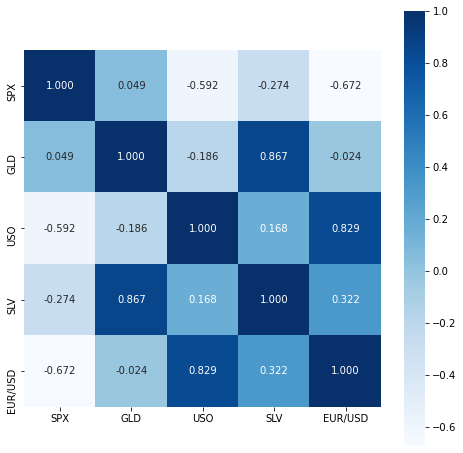

In [74]:
#Plotting heatmap to analyze the dependency and relationship between features
plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),cbar=True,square=True,fmt='.3f',annot=True,annot_kws={"size":10},cmap='Blues')

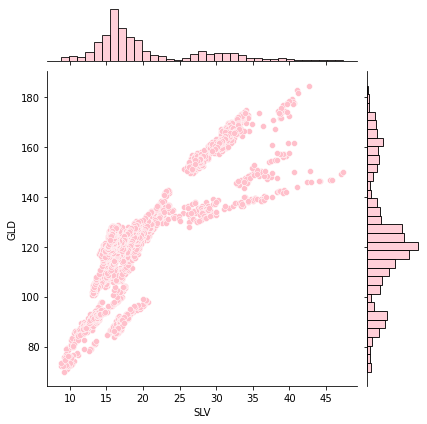

In [28]:
sns.jointplot(x=data['SLV'],y=data['GLD'],color='pink')

Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


C:\Users\jerus\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


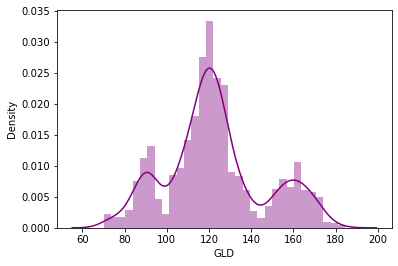

In [45]:
sns.distplot(data['GLD'],color='purple')
print('Skewness: %f', data['GLD'].skew())
print("Kurtosis: %f" % data['GLD'].kurt())

In [37]:
x=data.drop(['Date','GLD'],axis=1)
y=data['GLD']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(1832, 4) (458, 4)


### ACTUAL VS PREDICTED PRICE

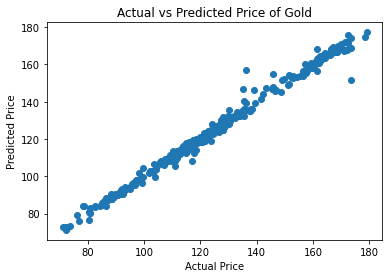

In [83]:
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price of Gold')
plt.show()

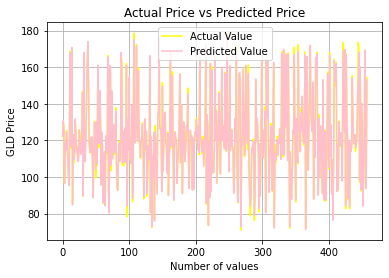

In [84]:
plt.plot(y_test, color='yellow', label = 'Actual Value')
plt.plot(y_predict, color='pink', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(2.5)

### Printing histograms to see layout of values for each feature

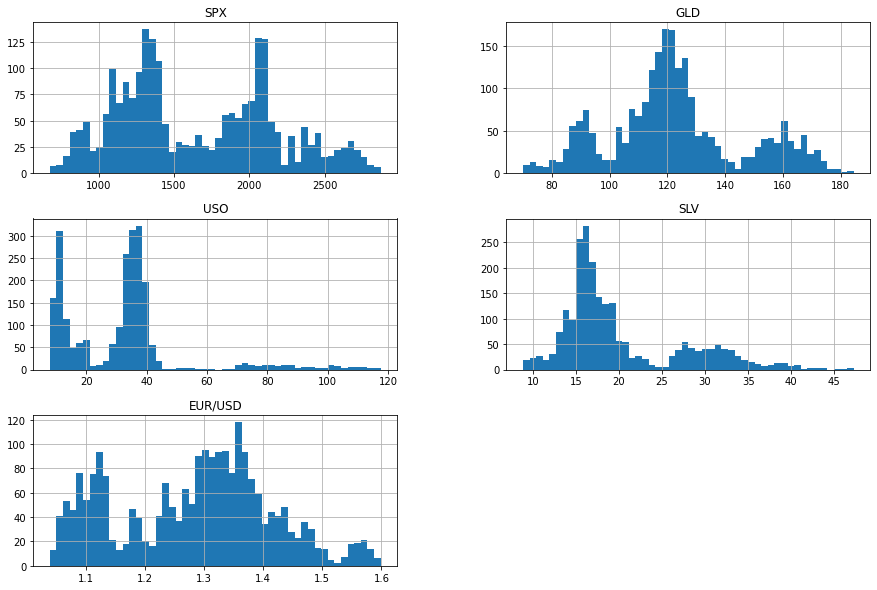

Printing histograms to see layout of values for each feature


In [85]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(15, 10))
plt.show()

print("Printing histograms to see layout of values for each feature")

### Plotting sns pair plot to see pairwise relation between all the features

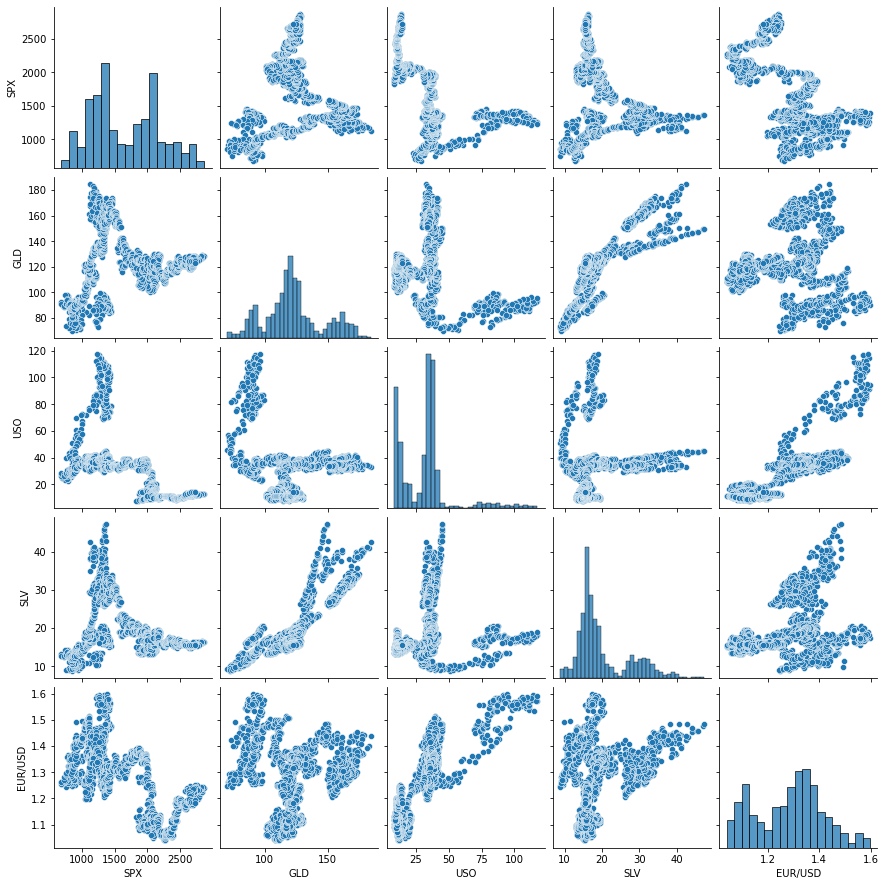

In [86]:
sns.pairplot(data.loc[:,data.dtypes == 'float64'])

## Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [88]:
y_pred=regressor.predict(x_test)
y_pred

array([122.40549977, 130.45990282, 127.80390003,  96.72169752,
       119.1471005 , 114.52409945, 124.83270114, 117.83069942,
       107.99770112,  98.17299961,  95.22209982, 167.95979835,
       148.71880041, 116.47319995, 170.8122013 ,  85.29249977,
       123.18949894, 108.71989747, 113.48130013, 131.6522027 ,
       124.27559897, 113.6739011 , 116.03770054, 108.65449969,
       108.65640156, 125.77109957, 119.23979974, 112.47359937,
       113.3952015 , 125.78399914, 146.20560154,  89.55220002,
       167.52769962, 114.13979904, 108.37920075, 120.33210101,
       142.39889924, 161.42820168, 173.83779822, 153.10120125,
       119.73970105, 112.98820089, 121.34169966, 113.65649908,
       121.87060041, 107.80380055,  88.63509905, 114.64709905,
       129.95580255, 118.0038012 , 104.27490031, 129.92320259,
       107.03359878, 160.61360403, 131.55170039, 118.2296997 ,
       146.54639991, 134.97580191,  95.57350127, 124.7325016 ,
       115.61209874,  86.28760065, 104.29739909, 113.88

In [89]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.237994027117905
MSE :   5.230829938768043
RMAE :   2.2871007714501874


In [90]:
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.9904599107530069


In [91]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print('accuracy_train',accuracy_train)
print('accuracy_test',accuracy_test)

accuracy_train 0.9985928378593183
accuracy_test 0.9904599107530069


In [93]:
regressor.score(x_test,y_test)

y_predict = regressor.predict(x_test)
y_predict

array([122.40549977, 130.45990282, 127.80390003,  96.72169752,
       119.1471005 , 114.52409945, 124.83270114, 117.83069942,
       107.99770112,  98.17299961,  95.22209982, 167.95979835,
       148.71880041, 116.47319995, 170.8122013 ,  85.29249977,
       123.18949894, 108.71989747, 113.48130013, 131.6522027 ,
       124.27559897, 113.6739011 , 116.03770054, 108.65449969,
       108.65640156, 125.77109957, 119.23979974, 112.47359937,
       113.3952015 , 125.78399914, 146.20560154,  89.55220002,
       167.52769962, 114.13979904, 108.37920075, 120.33210101,
       142.39889924, 161.42820168, 173.83779822, 153.10120125,
       119.73970105, 112.98820089, 121.34169966, 113.65649908,
       121.87060041, 107.80380055,  88.63509905, 114.64709905,
       129.95580255, 118.0038012 , 104.27490031, 129.92320259,
       107.03359878, 160.61360403, 131.55170039, 118.2296997 ,
       146.54639991, 134.97580191,  95.57350127, 124.7325016 ,
       115.61209874,  86.28760065, 104.29739909, 113.88

## Support Vector Regressor

In [133]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

SVR()

In [135]:
y_pred = regressor.predict(x_test)
y_pred  

array([119.47242232, 123.9610407 , 123.98368136, 121.03027404,
       119.5438273 , 121.34611476, 120.33053599, 119.72417304,
       122.74155547, 115.1636773 , 105.46147696, 123.43264983,
       120.19325283, 115.51144404, 123.2039588 , 110.88606274,
       122.7935962 , 120.10776833, 120.07274127, 118.66143249,
       123.06167065, 121.37542307, 115.85936053, 116.30580464,
       123.10583606, 120.05067805, 119.66032102, 122.45071494,
       116.51724137, 124.10644142, 121.95045421, 122.07340303,
       121.57357614, 120.07663825, 122.67545987, 119.45143397,
       124.12685858, 123.78776071, 119.29702668, 123.91323647,
       119.95214817, 120.09012095, 119.42573062, 121.47565617,
       119.37033252, 122.48432307, 106.85928232, 121.39030037,
       123.9155573 , 121.4171359 , 115.49017566, 123.87145415,
       116.85027471, 122.35270448, 121.19128351, 123.59827732,
       121.86184135, 118.20652625, 111.21011526, 119.32863631,
       116.6449573 , 121.48653561, 121.35909992, 120.46